# **Python Libraries**

## Imports  
* Module: Smallest unit of code reusability. File containing Python definitions and statements
* Package: Logical collection of modules. Often bundles large products and broad functionality
* Standard Library: Collection of packages and modules. Distributed with Python by default
* Script: Any Python code invoked as an executable. Usually from the command line

### Importing from a module

In [57]:
# Import a module
import math
math.sqrt(16) # => 4


4.0

In [58]:
# Import symbols from a module into the local namespace
from math import ceil, floor
ceil(3.7) # => 4.0
floor(3.7) # => 3.0


3

In [ ]:
# Bind a module symbols to a new local symbol
from some_module import long_symbol_name as short_name
# Any python file (including your own) can be a module
from my_script import my_function, my_variable

### Importing from packages  


In [ ]:
# Packages give structure to modules
import sound.effects.echo
sound.effects.echo.echofilter(input, output)

from sound.effects import echo
echo.echofilter(input, output, delay=0.7, atten=4)

from sound.effects.echo import echofilter
echofilter(input, output, delay=0.7, atten=4)
# A namespace, in a sense...
#__init__.py can distinguish packages from normal directories

### Package import rules  


```
# The item can be a submodule (or subpackage) of package
from package import item
# All but the last must be packages
import item.subitem.subsubitem
```  

Import Conventions:
* Imports go at the top of the file after header comment.
  * Why? Clear dependencies, avoid conditional imports
* Prefer `import ...` to `from ... import ...`
  * Why? Explicit namespaces avoid name conflicts
* Avoid `from ... import *`
  * Why? Unclear what is being imported, strange behavior

## The Standard Library

### Collections

#### namedtuple

In [16]:
# use to create tuple subclasses with NAMED FIELDS
import collections
Point = collections.namedtuple('Point', ['x', 'y'])

AnotherTuple = collections.namedtuple("TupleName", ['x', 'y', 'z'])



In [17]:
p = Point(11, 22) # positional arguments...
q = Point(x=11, y=22) # or keyword arguments (or both!)

k = AnotherTuple(2, 3, 4)


In [12]:
# Fields are accessible by name! "Readability counts."
-p.x, 2 * p.y # => -11, 44


(-11, 44)

In [18]:
# readable __repr__ with a name=value style
print(p) # Point(x=11, y=22)


Point(x=11, y=22)


In [19]:
print(k)

TupleName(x=2, y=3, z=4)


In [7]:
# Subscriptable, like regular tuples
p[0] * p[1] # => 242


242

In [8]:
# Unpackable, like regular tuples
x, y = p # x == 11, y == 22


In [ ]:
# Usually don’t need to unpack if attributes have names
math.hypot(p.x - other.x, p.y - other.y) # raises error

An example of a tuple

In [ ]:
# Can you guess the context of this code?
p = (170, 0.1, 0.6)
if p[1] >= 0.5:
  print("Whew, that is bright!")
if p[2] >= 0.5:
  print("Wow, that is light!")
# BAD!

Alternative implementation

In [ ]:
Color = collections.namedtuple("Color",["hue", "saturation", "luminosity"])
pixel = Color(170, 0.1, 0.6)
if pixel.saturation >= 0.5:
  print("Whew, that is bright!")
if pixel.luminosity >= 0.5:
  print("Wow, that is light!")
# GOOD!

#### defaultdict

Dict subclass with factory function for missing values  
**Have:**  
`input_data = [('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1)]`  
**Want:**  
`output = {'blue': [2, 4], 'red': [1], 'yellow': [1, 3]}`

One Approach

In [20]:
input_data = [('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1)]
# One approach
output = {}
for k, v in input_data:
  if k not in output:
    output[k] = []
  output[k].append(v)
print(output)
# => {'blue': [2, 4], 'red': [1], 'yellow': [1, 3]}


{'yellow': [1, 3], 'blue': [2, 4], 'red': [1]}


A Better Approach

In [21]:
# accepts one argument - a zero-argument
# factory function to supply missing keys
output = collections.defaultdict(lambda: list())
for k, v in input_data:
  output[k].append(v) # When key is missing, go to the factory

print(output)


defaultdict(<function <lambda> at 0x7fdbc9dad0e0>, {'yellow': [1, 3], 'blue': [2, 4], 'red': [1]})


Zero-Argument Callable

In [ ]:
# defaultdict with default value []
collections.defaultdict(lambda: list())

# equivalent to
collections.defaultdict(list)

# defaultdict with default value 0
collections.defaultdict(lambda: 0)

# equivalent to
collections.defaultdict(int)

**Have:**  
`s = ’mississippi’`  
**Want:**  
`d = {’i’: 4, ’p’: 2, ’m’: 1, ’s’: 4}`

In [ ]:
s = "mississippi"
d = collections.defaultdict(int) # or... lambda: 0
for letter in s:
  d[letter] += 1

print(d)


In [60]:
s = "mississippi"
z = {}
for letter in s:
  z[letter] += 1

print(z)

KeyError: ignored

#### Counter

Dict subclass for counting hashable objects  
**Have:**  
`s = ’mississippi’`  
**Want:**  
`d = {’i’: 4, ’p’: 2, ’m’: 1, ’s’: 4}`

In [23]:
s = "mississippi"
count = collections.Counter(s)
print(count)
# => Counter({’i’: 4, ’m’: 1, ’p’: 2, ’s’: 4}) 


Counter({'i': 4, 's': 4, 'p': 2, 'm': 1})


In [24]:
print(list(count.items()))
# => [(’s’, 4), (’m’, 1), (’i’, 4), (’p’, 2)]

[('m', 1), ('i', 4), ('s', 4), ('p', 2)]


Tally occurrences of words in a list  
`colors = [’red’, ’blue’, ’red’, ’green’, ’blue’]`  


In [25]:
colors = ['red', 'blue', 'red', 'green', 'blue']

One Approach

In [26]:
counter = collections.Counter()
for color in colors:
  counter[color] += 1
print(counter)
# Counter({’blue’: 2, ’green’: 1, ’red’: 2})

Counter({'red': 2, 'blue': 2, 'green': 1})


A Better Approach

In [27]:
counter = collections.Counter(colors)
print(counter)


Counter({'red': 2, 'blue': 2, 'green': 1})


Get most common elements

In [ ]:
collections.Counter("abracadabra").most_common(3)
# => [(’a’, 5), (’b’, 2), (’r’, 2)]



In [28]:
# Supports basic arithmetic
collections.Counter("which") + collections.Counter("witch")
# => Counter({’c’: 2, ’h’: 3, ’i’: 2, ’t’: 1, ’w’: 2})



Counter({'c': 2, 'h': 3, 'i': 2, 't': 1, 'w': 2})

In [29]:
collections.Counter("abracadabra") - collections.Counter("alakazam")
# => Counter({’a’: 1, ’b’: 2, ’c’: 1, ’d’: 1, ’r’: 2})

Counter({'a': 1, 'b': 2, 'c': 1, 'd': 1, 'r': 2})

### Regular Expression   
Regular expression operations  
"regular expression" == "search pattern" for strings

Search for pattern match anywhere in string  
return `None` if not found  
`\w` matches word characters  
`+` is for one or more occurrences of preceding expression

In [31]:
import re
m = re.search(r"(\w+) (\w+)", "Isaac Newton, Physicist")
m.group(0) # "Isaac Newton" - the entire match
m.group(1) # "Isaac" - first parenthesized subgroup
m.group(2) # "Newton" - second parenthesized subgroup

'Newton'

Match pattern against start of string  
return `None` if not found

In [32]:
m = re.match(r"(?P<fname>\w+) (?P<lname>\w+)", "Jeff Fox")
m.group("fname") # => ’Jeff’
m.group("lname") # => ’Fox’

'Fox'

Substitute occurrences of one pattern with another

In [ ]:
re.sub(r"@\w+\.com", "@stanford.edu", "sam@go.com poohbear@bears.com")
# => sam@stanford.edu poohbear@stanford.edu

compile pattern for fast operations  
`[a-z]`: Match any lowercase  
`[0-9]`: Match any digit  
`{3}`: match exactly three digits  

In [61]:
pattern = re.compile(r'[a-z]+[0-9]{3}')
# pattern is first argument
match = re.search(pattern, '@@@abc123')
match.span() # (3, 9)
#span() Return a tuple containing the (start, end)
# positions of the match

(3, 9)

Write a regular expression to match a phone number like  
650 867-5309  
Hint: \d captures [0-9], i.e. any digit  
Hint: \d{3} captures 3 consecutive digits

In [36]:
def is_phone(num):
  return bool(re.match("\d{3} \d{3}-\d{4}", num))

def get_area_code(num):
  m = re.match("(?P<areacode>\d{3}) \d{3}-\d{4}", num)
  if not m:
    return None
  return m.group('areacode')

is_phone("650 867-5309") # => True


True

In [34]:
is_phone("650.867.5309") # => False


False

In [35]:
get_area_code("650 867-5309") # => ’650’

'650'

Find the three most common words in Hamlet

In [62]:
with open('hamlet.txt') as f:
  words = re.findall(r'\w+', f.read().lower())
collections.Counter(words).most_common(3)
# => [('the', 1091), ('and', 969), ('to', 767)]


[('the', 1091), ('and', 969), ('to', 767)]

In [38]:
with open('hamlet.txt') as f:
  words = re.findall(r'\w{5}', f.read().lower())
collections.Counter(words).most_common(3)
# => [('queen', 121), ('hamle', 117), ('there', 116)]

[('queen', 121), ('hamle', 117), ('there', 116)]

###itertools  
Iterators for efficient looping

In [40]:
import itertools

def view(it):
  print(*map(''.join, it))



In [42]:
view(itertools.product("ABCD", "EFGH"))
# => AE AF AG AH BE BF BG BH CE CF CG CH DE DF DG DH


AE AF AG AH BE BF BG BH CE CF CG CH DE DF DG DH


In [ ]:
view(itertools.product("ABCD", repeat=2))
# => AA AB AC AD BA BB BC BD CA CB CC CD DA DB DC DD


In [ ]:
view(itertools.permutations("ABCD", 2))
# => AB AC AD BA BC BD CA CB CD DA DB DC


In [ ]:
view(itertools.combinations("ABCD", 2))
# => AB AC AD BC BD CD


In [ ]:
view(itertools.combinations_with_replacement("ABCD", 2))
# => AA AB AC AD BB BC BD CC CD DD

Infinite iterators

In [43]:
# start, [step] -> start, start + step, ...
itertools.count(10) # -> 10, 11, 12, 13, 14, ...

count(10)

In [44]:
# Cycle through elements of an iterable
itertools.cycle("ABC") # -> ’A’, ’B’, ’C’, ’A’, ...


In [45]:
# Repeat a single element over and over.
itertools.repeat(10) # -> 10, 10, 10, 10, ...

repeat(10)

###JSON  


```
import json
squares = {1:1, 2:4, 3:9, 4:16}
# Serialize to/from string
output = json.dumps(squares) # output == "{1:1, 2:4, 3:9, 4:16}"
json.loads(output) # => {1:1, 2:4, 3:9, 4:16}

# Serialize to/from file
with open(’tmp.json’, ’w’) as outfile:
  json.dump(squares, outfile)

with open(’tmp.json’, ’r’) as infile:
  input = json.load(infile)

# All variants support useful keyword arguments
json.dumps(data, indent=4, sort_keys=True, separators=(’,’, ’: ’))
```

### Random  
Generate pseudo-random numbers

In [63]:
import random
# Random float x with 0.0 <= x < 1.0
random.random()


0.6409865983206653

In [ ]:
# Random float x, 1.0 <= x < 10.0
random.uniform(1, 10) 


In [ ]:
# Random integer from 1 to 6 (inclusive)
random.randint(1, 6) 


In [47]:
# Random integer from 0 to 9 (inclusive)
random.randrange(10)


1

In [48]:
# Random even integer from 0 to 100 (inclusive)
random.randrange(0, 101, 2)


16

In [69]:
# Choose a single element
random.choice("abcdefghij") 


'i'

In [70]:
items = [1, 2, 3, 4, 5, 6, 7]
random.shuffle(items)
items 

[7, 5, 1, 6, 3, 4, 2]

In [71]:

# k samples without replacement
random.sample(range(5), k=3)

[4, 1, 0]

In [ ]:
# Sample from statistical distributions (others exist)
random.normalvariate(mu=0, sigma=3)

### Builtin Functions

In [ ]:
any([True, True, False]) # => True


In [ ]:
all([True, True, False]) # => False


In [ ]:
int("45") # => 45


In [ ]:
int("0x2a", 16) # => 42


In [ ]:
int("1011", 2) # => 11


In [ ]:
hex(42) # => "0x2a"


In [ ]:
bin(42) # => "0b101010"


In [ ]:
ord("a") # => 97


In [ ]:
chr(97) # => "a"


In [ ]:
round(123.45, 1) # => 123.4


In [ ]:
round(123.45, -2) # => 100

In [ ]:
max(2, 3) # => 3
max([0, 4, 1]) # => 4
min(["apple", "banana", "pear"], key=len) # => "pear"


In [ ]:
sum([3, 5, 7]) # => 15


In [ ]:
pow(3, 5) # => 243 (= 3 ** 5)
pow(3, 5, 10) # => 3 (= (3 ** 5) % 10, efficiently)


In [ ]:
quotient, remainder = divmod(10, 6)
# quotient, remainder => (1, 4)


In [ ]:
# Flatten a list of lists (slower than itertools.chain)
sum([[3, 5], [1, 7], [4]], []) # => [3, 5, 1, 7, 4]

Other Modules  
(see slides)

## Third-Party Packages

### NumPy  
* N-dimensional array object
* Sophisticated functions
* Capabilities
  * Linear algebra
  * Fourier transform
  * Random sampling  
  
NumPy Documentation: https://numpy.org/doc/ 

In [50]:
import numpy as np
a = np.arange(15).reshape(3, 5)
print(a)
# array([[ 0, 1, 2, 3, 4],
# [ 5, 6, 7, 8, 9],
# [10, 11, 12, 13, 14]])


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [51]:
a.shape # => (3, 5)


(3, 5)

In [52]:
a.ndim # => 2


2

In [53]:
a.dtype.name # => ’int64’

'int64'

In [54]:

type(a) # => numpy.ndarray

numpy.ndarray

In [55]:
print(a[:, 1]) # => array([ 1, 6, 11])

[ 1  6 11]


In [ ]:
a = np.array([3, 4, 5])
a + 4 # => array([7, 8, 9])


In [ ]:
a * 1.5 # => array([ 4.5, 6. , 7.5])


In [72]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
b = np.array([4, -1, 0])
np.dot(a, b) # => 8 (= 3 * 4 + 4 * -1 + 5 * 0)


In [74]:
a.sum() # => 12


105

In [76]:
# 100 interpolated numbers between 0 and 6.28
space = np.linspace(0, 2 * np.pi, 100)
space

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [ ]:
sinusoid = np.sin(space)
# trigonometry - pi corresponds to 180 degrees

### SciPy  
Everything you need for mathematics, science, and engineering  
SciPy Documentation: https://docs.scipy.org/doc/scipy-1.8.0/html-scipyorg/reference/

In [ ]:
import numpy as np
from scipy import linalg

# Invert a matrix
A = np.array([[1, 2], [3, 4]])
print(linalg.inv(A))


### MatPlotLib + PyPlot  
* Python 2D Plotting Library
* Think MATLAB + Python  

MatPlotLib Examples: https://matplotlib.org/2.0.2/examples/index.html  
Gallery: https://matplotlib.org/2.0.2/gallery.html  

Python Graph Galery (**you will like this**): https://www.python-graph-gallery.com/  

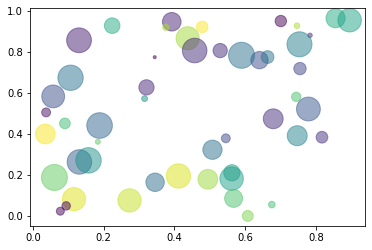

<Figure size 432x288 with 0 Axes>

In [56]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()
plt.savefig("scatter.png") # comment out plt.show()

### Some other Important Libraries and Packages
* Tensorflow (Machine Learning): https://www.tensorflow.org/
* Keras (High Level API): https://keras.io/ 
* Scikit-learn (Machine Learning): https://scikit-learn.org/stable/ 
* Nltk (Natural Language Toolkit): https://www.nltk.org/ 
* Pytorch (Deep Learning): https://pytorch.org/ 
* Pandas (Vectorized Data Manipulation): https://pandas.pydata.org/pandas-docs/stable/reference/index.html 